## Importing some important libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn              import svm
from scipy.signal import savgol_filter


### loading the dataset into pandas dataframe

In [2]:
Dict = {'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06',
        'July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}

def TemperatureByCountry(Country = ('India' , 'China'),  Month = 'May' , From_Date = '1743-11-01' , To_Date = '2013-01-01'):

    """"
    # Function Description : 
        This Function Takes tuple of one or more Countries.  
        Function Takes Particular Month of a year.  
        Function takes Timeframe(From_Date , End-Date).  
    # Function Parameters : 
            # Country : 
                    This Parameter takes tuples of Countries as Input.\n
                    Default is ('India' , 'China')
            
            # Month : 
                    This Parameter takes Month Name as Input.\n
                    Default is 'May'.
            # From_Date : 
                    This Parameter is the Starting Date of the Dataset.\n
                    Default is '1743-11-01'
            # To_Date : 
                    This Parameter is the Ending Date of the Dataset.\n
                    Default is 2013-01-01'
            
    """
   
    if isinstance(Country , str):
        Country = [Country,]
    
    File = pd.read_csv(r'dataset/Temperature/GlobalLandTemperaturesByCountry.csv')

    File.columns = ['Date' , 'Avg_Temperature' , 'Avg_Uncertainity','Country']

    File.dropna(subset = ['Avg_Temperature'] , inplace = True)

    File = File[File['Date'].between(From_Date,To_Date)]

    File = File[File['Date'].str.contains(Dict[Month])]
    #File[File['Date']] = File[File['Date'].str[:4]]
    
    File['Year'] = pd.DatetimeIndex(File['Date']).year

    File.reset_index(drop = True , inplace = True)
    
    New = pd.DataFrame
    Flag = 1

    for Ptr in Country:
        NewFile = File[File['Country'] == Ptr]

        NewFile = NewFile.drop(['Avg_Uncertainity','Country'],axis = 1)
        NewFile = NewFile.rename(columns = {'Avg_Temperature':Ptr})
        
        if(Flag == 1):
            New = NewFile
            Flag = 0
        else:
            #New = New.merge(NewFile)
            New = New.merge(NewFile)
    return New

def GetDataFrame(Country = ('India'), Month = 'May', From_Date = '1900-05-01', To_Date = '2013-12-01'):
    return TemperatureByCountry(Country, Month , From_Date, To_Date)


In [3]:
Country = 'India'
Month = 'May'
From_Date = '1743-11-01'
To_Date = '2013-01-01'
df = GetDataFrame((Country), Month, From_Date , To_Date)

In [4]:
df

,Date,India,Year
21684,1796-05-01,30.035,1796
21685,1797-05-01,29.364,1797
21686,1799-05-01,30.217,1799
21687,1800-05-01,29.372,1800
21688,1802-05-01,29.209,1802
...,...,...,...
21918,2008-05-01,30.079,2008
21919,2009-05-01,30.493,2009
21920,2010-05-01,31.169,2010
21921,2011-05-01,30.421,2011


In [5]:
X = df['Year'].values.reshape(-1, 1)
Y = df[Country]
Y

21684    30.035
21685    29.364
21686    30.217
21687    29.372
21688    29.209
          ...  
21918    30.079
21919    30.493
21920    31.169
21921    30.421
21922    30.805
Name: India, Length: 239, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
Data_list = [X_train, X_test, y_train, y_test]

In [7]:
Kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
def Model_Selection(Model,Data_list, name):
    
    
    Model.fit(Data_list[0],Data_list[2])
    
    
    y_Pred = Model.predict(Data_list[1])

    MAE = round(sm.mean_absolute_error(y_test, y_Pred), 2)
    MSE = round(sm.mean_squared_error(y_test, y_Pred), 2)
    MeAE = round(sm.median_absolute_error(y_test, y_Pred), 2)
    Variance = round(sm.explained_variance_score(y_test, y_Pred), 2)
    R2_Score =  round(sm.r2_score(y_test, y_Pred), 2)

    
    frame = pd.DataFrame({'Model': [name], 'MeanAbsoluteError': [MAE], 'MeanSquaredError': [MSE], 'MedianAbsoluteError': [MeAE], 'Variance': [abs(Variance)], 'R2_score':[abs(R2_Score)]})
    return frame

In [8]:
model1 = LinearRegression()
model2 = svm.SVR()
model3 = ElasticNet()
model4 = Lasso(alpha=0.1)
model5 = BayesianRidge()
Model_data = pd.concat([
                       Model_Selection(model1, Data_list, 'LinearRegression'),
                       Model_Selection(model2, Data_list, 'SupportVectorRegression'),
                       Model_Selection(model3, Data_list, 'ElasticNet'),
                       Model_Selection(model4, Data_list, 'Lasso'),
                       Model_Selection(model5, Data_list, 'BaysianRidge')],axis = 0).reset_index()
Model_data

,index,Model,MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,Variance,R2_score
0,0,LinearRegression,2.19,16.37,1.08,0.04,0.10
1,0,SupportVectorRegression,2.12,18.00,0.54,0.02,0.21
2,0,ElasticNet,2.19,16.36,1.08,0.04,0.10
3,0,Lasso,2.19,16.37,1.08,0.04,0.10
4,0,BaysianRidge,2.20,16.26,1.11,0.03,0.09


In [9]:
Model = svm.SVR()
Model.fit(Data_list[0],Data_list[2])
y_Pred = Model.predict([[2024]])
y_Pred


Year = []
temp = []
def Predict(year, Model):
    
    for i in range(1940, year + 1):
        print(i)
        print(Model.predict([[i]]))
        Year.append(i)
        #print(Model.predict([[i]]))
        temp.append(Model.predict([[i]])[0])

Predict(2005, Model)
print(Year)
print(temp)
        
        

1940
[29.96120779]
1941
[29.96972879]
1942
[29.97804791]
1943
[29.98615325]
1944
[29.99403377]
1945
[30.00167932]
1946
[30.0090807]
1947
[30.01622968]
1948
[30.02311908]
1949
[30.02974274]
1950
[30.0360956]
1951
[30.04217368]
1952
[30.04797411]
1953
[30.05349511]
1954
[30.05873604]
1955
[30.06369735]
1956
[30.06838057]
1957
[30.07278832]
1958
[30.07692424]
1959
[30.08079303]
1960
[30.08440035]
1961
[30.08775279]
1962
[30.09085786]
1963
[30.09372393]
1964
[30.09636013]
1965
[30.09877636]
1966
[30.1009832]
1967
[30.10299182]
1968
[30.10481396]
1969
[30.10646184]
1970
[30.10794808]
1971
[30.10928563]
1972
[30.11048773]
1973
[30.11156778]
1974
[30.11253932]
1975
[30.11341592]
1976
[30.11421112]
1977
[30.11493835]
1978
[30.11561089]
1979
[30.11624174]
1980
[30.11684363]
1981
[30.11742889]
1982
[30.11800941]
1983
[30.11859659]
1984
[30.11920131]
1985
[30.11983379]
1986
[30.12050366]
1987
[30.12121981]
1988
[30.12199043]
1989
[30.12282293]
1990
[30.12372392]
1991
[30.1246992]
1992
[30.1257537

## Plotting the graph

In [10]:
df

,Date,India,Year
21684,1796-05-01,30.035,1796
21685,1797-05-01,29.364,1797
21686,1799-05-01,30.217,1799
21687,1800-05-01,29.372,1800
21688,1802-05-01,29.209,1802
...,...,...,...
21918,2008-05-01,30.079,2008
21919,2009-05-01,30.493,2009
21920,2010-05-01,31.169,2010
21921,2011-05-01,30.421,2011


In [11]:
Country = 'India'
Month = 'May'
From_Date = '1901-05-01'
To_Date = '2000-01-01'
df = GetDataFrame((Country), Month, From_Date , To_Date)

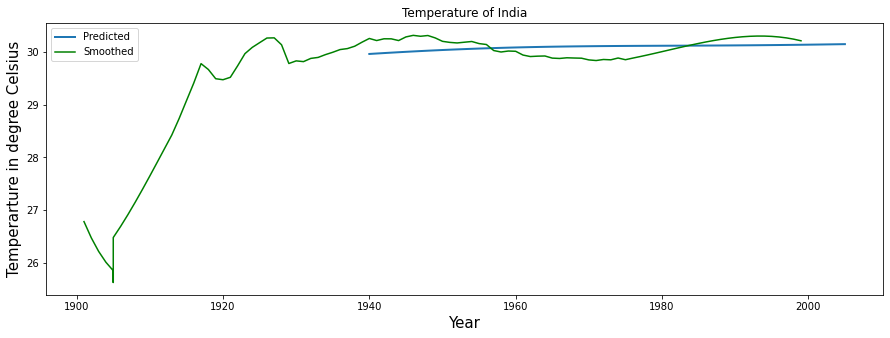

In [12]:
Arr = np.array([list(df['Year']), list(df[df.columns[1]])])
Smoothed = savgol_filter(Arr[1], window_length=47, polyorder=3, mode='interp')

plt.rcParams['figure.figsize'] = [15, 5]
plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperarture in degree Celsius', fontsize=15)
plt.title('Temperature of ' + df.columns[1])

plt.plot(Year, temp, label='Predicted', linewidth=2)

#Plot = df.plot(x = 'Year', linestyle='dashed', linewidth=2, title='Temperature of ' + df.columns[1], ylabel='Temperature in degree celsius')
plt.plot(Arr[0], Smoothed, color='green', label='Smoothed')
# y_mean = [np.mean(Arr[1])]*len(Arr[0])
# plt.plot(Arr[0], y_mean, label='Mean', color='orange')
legend = plt.legend(loc='upper left')
plt.show()